In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pitt-quantum-repository-106066-molecules/Pitt_Quantum_Repository_Data.json
/kaggle/input/extroversion-with-gpa/Extroversion with GPA.xlsx


In [2]:
filepath = '/kaggle/input/pitt-quantum-repository-106066-molecules/Pitt_Quantum_Repository_Data.json'
df = pd.read_json(filepath)
df.head()

,ark,cas,chemspider_id,doi,elements,exact mass,formula,inchi,inchikey,iupac_name,molecular mass,name,pm7,pointGroup,pubchem_cid,shortdoi,smiles,synonyms,tags,wiki
0,ark:/c7614/q4p88g,None,9235514,10.17614/Q4P88G,"[H, C, O, N]",517.288697,C25H43NO10,"InChI=1S/C25H43NO10/c1-13-10-25(32-8,36-15(3)1...",AAABMNXUOFPYQK-AYUQAVNMSA-N,"(2S)-N-[(4S,4aR,6R,8S,8aR)-6-[(2S)-3-hydroxy-2...",517.60962,mycalamide b,"{'alpha': ['369.100255', '-4.674736', '5.27392...",C1,46173853,10/f28fr4,OC[C@H](C[C@H]1O[C@H]2[C@H](OCO[C@@H]2[C@H](C1...,,"[alkene, hydrophilic, amide, alkyl, acetal, ca...",
1,ark:/c7614/q4np1x57f,None,5143541,10.17614/Q4NP1X57F,"[C, O, N]",497.132196,C25H23NO10,"InChI=1S/C25H43NO10/c1-13-10-25(32-8,36-15(3)1...",AAABMNXUOFPYQK-DJKHTABZSA-N,"(E)-(6-ethynyl-7-methyl-8-methylene-6,7-dihydr...",497.45082,"2-hydroxy-n-{(4s,6r,8ar)-6-[(2s)-3-hydroxy-2-m...","{'alpha': ['421.116172', '61.760102', '56.8618...",C1,,10/f3c3rh,OC#CC1=C[C@H](OC(=C)C1=C)C(=O)C(=O)/N=C\1/OCOC...,,"[alkene, enol_ether, hydrophilic, amide, alkyl...",
2,ark:/c7614/q4jg6j,None,9235514,10.17614/Q4JG6J,"[H, C, O, N]",517.288697,C25H43NO10,"InChI=1S/C25H43NO10/c1-13-10-25(32-8,36-15(3)1...",AAABMNXUOFPYQK-FJRLJLDZSA-N,"(2S)-N-[(4S,4aR,6R,8S,8aR)-6-[(2S)-3-hydroxy-2...",517.60962,mycalamide b,"{'alpha': ['369.100255', '-4.674736', '5.27392...",C1,6711419,10/f28fr5,OC[C@H](C[C@H]1O[C@H]2[C@H](OCO[C@@H]2[C@H](C1...,,"[alkene, hydrophilic, amide, alkyl, acetal, ca...",
3,ark:/c7614/q4qp4d,None,9235514,10.17614/Q4QP4D,"[H, C, O, N]",513.257396,C25H39NO10,"InChI=1S/C25H43NO10/c1-13-10-25(32-8,36-15(3)1...",AAABMNXUOFPYQK-GRMLSQNXSA-N,"(2s)-n-[(4s,4as,6r,8s,8ar)-6-[(2s)-3-hydroxy-2...",513.57786,mycalamide b,"{'alpha': ['356.295207', '13.908273', '-4.2626...",C1,11060358,10/f28fr6,C=C1CCO[C@H]2[C@@H](C1)C2.O=CC(=O)N[C@H]1OCO[C...,"[(2s)-n-[(4s,4as,6r,8s,8ar)-6-[(2s)-3-hydroxy-...","[alkene, hydrophilic, amide, alkyl, acetal, ca...",
4,ark:/c7614/q4kw2g,None,1363040,10.17614/Q4KW2G,"[H, S, C]",168.097272,C10H16S,"InChI=1S/C10H16S/c1-9(2)7-4-5-10(9,3)8(11)6-7/...",AAADKYXUTOBAGS-XCBNKYQSSA-N,"(1R,4R)-1,7,7-trimethylnorbornane-2-thione",168.29904,"(1r,4r)-1,7,7-trimethylbicyclo[2.2.1]heptane-2...","{'alpha': ['157.572124', '9.901171', '-2.02927...",C1,1714210,10/f28fr7,S=C1C[C@@H]2C([C@@]1(C)CC2)(C)C,"[(1r)-(&#8722;)-1,7,7-trimethylbicyclo[2.2.1]h...","[alkyl, ring, thiocarbonyl]",


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values[missing_values > 0], "\n")

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = df.select_dtypes(include=["number"]).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Missing Values in Each Column:
 ark                  99
cas               74411
doi                  99
elements             60
exact mass          675
formula              80
inchi                71
iupac_name           37
molecular mass       80
name                 40
shortdoi             99
smiles              140
tags                140
dtype: int64 

Categorical Columns: ['ark', 'cas', 'chemspider_id', 'doi', 'elements', 'formula', 'inchi', 'inchikey', 'iupac_name', 'name', 'pm7', 'pointGroup', 'pubchem_cid', 'shortdoi', 'smiles', 'synonyms', 'tags', 'wiki']
Numerical Columns: ['exact mass', 'molecular mass']


In [4]:
from sklearn.impute import SimpleImputer

# Convert list and dictionary-type values in categorical columns to strings
df[categorical_cols] = df[categorical_cols].applymap(lambda x: str(x) if isinstance(x, (list, dict)) else x)

# Apply SimpleImputer for categorical columns
imputer = SimpleImputer(strategy="most_frequent")
df_imputed = df.copy()
df_imputed[categorical_cols] = imputer.fit_transform(df[categorical_cols])

print("\nMissing values after imputation:\n", df_imputed.isnull().sum())

# Save the cleaned data
df_imputed.to_csv("cleaned_data.csv", index=False)
print("Cleaned CSV saved successfully!")


<ipython-input-4-504ed04e2b4e>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[categorical_cols] = df[categorical_cols].applymap(lambda x: str(x) if isinstance(x, (list, dict)) else x)



Missing values after imputation:
 ark                   0
cas               74411
chemspider_id         0
doi                   0
elements              0
exact mass          675
formula               0
inchi                 0
inchikey              0
iupac_name            0
molecular mass       80
name                  0
pm7                   0
pointGroup            0
pubchem_cid           0
shortdoi              0
smiles                0
synonyms              0
tags                  0
wiki                  0
dtype: int64
Cleaned CSV saved successfully!


In [5]:
cleaned_data = pd.read_csv('/kaggle/working/cleaned_data.csv')
cleaned_data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,ark,cas,chemspider_id,doi,elements,exact mass,formula,inchi,inchikey,iupac_name,molecular mass,name,pm7,pointGroup,pubchem_cid,shortdoi,smiles,synonyms,tags,wiki
0,ark:/c7614/q4p88g,NaN,9235514.0,10.17614/Q4P88G,"['H', 'C', 'O', 'N']",517.288697,C25H43NO10,"InChI=1S/C25H43NO10/c1-13-10-25(32-8,36-15(3)1...",AAABMNXUOFPYQK-AYUQAVNMSA-N,"(2S)-N-[(4S,4aR,6R,8S,8aR)-6-[(2S)-3-hydroxy-2...",517.60962,mycalamide b,"{'alpha': ['369.100255', '-4.674736', '5.27392...",C1,46173853.0,10/f28fr4,OC[C@H](C[C@H]1O[C@H]2[C@H](OCO[C@@H]2[C@H](C1...,NaN,"['alkene', 'hydrophilic', 'amide', 'alkyl', 'a...",NaN
1,ark:/c7614/q4np1x57f,NaN,5143541.0,10.17614/Q4NP1X57F,"['C', 'O', 'N']",497.132196,C25H23NO10,"InChI=1S/C25H43NO10/c1-13-10-25(32-8,36-15(3)1...",AAABMNXUOFPYQK-DJKHTABZSA-N,"(E)-(6-ethynyl-7-methyl-8-methylene-6,7-dihydr...",497.45082,"2-hydroxy-n-{(4s,6r,8ar)-6-[(2s)-3-hydroxy-2-m...","{'alpha': ['421.116172', '61.760102', '56.8618...",C1,NaN,10/f3c3rh,OC#CC1=C[C@H](OC(=C)C1=C)C(=O)C(=O)/N=C\1/OCOC...,NaN,"['alkene', 'enol_ether', 'hydrophilic', 'amide...",NaN
2,ark:/c7614/q4jg6j,NaN,9235514.0,10.17614/Q4JG6J,"['H', 'C', 'O', 'N']",517.288697,C25H43NO10,"InChI=1S/C25H43NO10/c1-13-10-25(32-8,36-15(3)1...",AAABMNXUOFPYQK-FJRLJLDZSA-N,"(2S)-N-[(4S,4aR,6R,8S,8aR)-6-[(2S)-3-hydroxy-2...",517.60962,mycalamide b,"{'alpha': ['369.100255', '-4.674736', '5.27392...",C1,6711419.0,10/f28fr5,OC[C@H](C[C@H]1O[C@H]2[C@H](OCO[C@@H]2[C@H](C1...,NaN,"['alkene', 'hydrophilic', 'amide', 'alkyl', 'a...",NaN
3,ark:/c7614/q4qp4d,NaN,9235514.0,10.17614/Q4QP4D,"['H', 'C', 'O', 'N']",513.257396,C25H39NO10,"InChI=1S/C25H43NO10/c1-13-10-25(32-8,36-15(3)1...",AAABMNXUOFPYQK-GRMLSQNXSA-N,"(2s)-n-[(4s,4as,6r,8s,8ar)-6-[(2s)-3-hydroxy-2...",513.57786,mycalamide b,"{'alpha': ['356.295207', '13.908273', '-4.2626...",C1,11060358.0,10/f28fr6,C=C1CCO[C@H]2[C@@H](C1)C2.O=CC(=O)N[C@H]1OCO[C...,"['(2s)-n-[(4s,4as,6r,8s,8ar)-6-[(2s)-3-hydroxy...","['alkene', 'hydrophilic', 'amide', 'alkyl', 'a...",NaN
4,ark:/c7614/q4kw2g,NaN,1363040.0,10.17614/Q4KW2G,"['H', 'S', 'C']",168.097272,C10H16S,"InChI=1S/C10H16S/c1-9(2)7-4-5-10(9,3)8(11)6-7/...",AAADKYXUTOBAGS-XCBNKYQSSA-N,"(1R,4R)-1,7,7-trimethylnorbornane-2-thione",168.29904,"(1r,4r)-1,7,7-trimethylbicyclo[2.2.1]heptane-2...","{'alpha': ['157.572124', '9.901171', '-2.02927...",C1,1714210.0,10/f28fr7,S=C1C[C@@H]2C([C@@]1(C)CC2)(C)C,"['(1r)-(&#8722;)-1,7,7-trimethylbicyclo[2.2.1]...","['alkyl', 'ring', 'thiocarbonyl']",NaN


In [6]:
from sklearn.impute import SimpleImputer

# Drop 'cas' column if it exists
if 'cas' in df.columns:
    df.drop(columns=['cas'], inplace=True)

# Ensure categorical_cols contains only existing columns
valid_categorical_cols = [col for col in categorical_cols if col in df.columns]

# Convert list and dictionary-type values in categorical columns to strings
df[valid_categorical_cols] = df[valid_categorical_cols].applymap(lambda x: str(x) if isinstance(x, (list, dict)) else x)

# Apply SimpleImputer for categorical columns (most frequent)
cat_imputer = SimpleImputer(strategy="most_frequent")
df[valid_categorical_cols] = cat_imputer.fit_transform(df[valid_categorical_cols])

# Apply SimpleImputer for numerical columns (median)
num_imputer = SimpleImputer(strategy="median")
df[['exact mass', 'molecular mass']] = num_imputer.fit_transform(df[['exact mass', 'molecular mass']])

print("\nMissing values after imputation:\n", df.isnull().sum())


<ipython-input-6-a259e7cfcb86>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[valid_categorical_cols] = df[valid_categorical_cols].applymap(lambda x: str(x) if isinstance(x, (list, dict)) else x)



Missing values after imputation:
 ark               0
chemspider_id     0
doi               0
elements          0
exact mass        0
formula           0
inchi             0
inchikey          0
iupac_name        0
molecular mass    0
name              0
pm7               0
pointGroup        0
pubchem_cid       0
shortdoi          0
smiles            0
synonyms          0
tags              0
wiki              0
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

# Exclude the 'formula' column from encoding
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()


# Apply Label Encoding to categorical columns
label_encoders = {}  # Store encoders for inverse transformation if needed
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convert to string in case of mixed types
    label_encoders[col] = le  # Save encoder for later use

print("Categorical variables encoded successfully!")

# Check updated DataFrame
print(df.head())


Categorical variables encoded successfully!
     ark  chemspider_id    doi  elements  exact mass  formula  inchi  \
0  74469          74128  74469       441  517.288697    26857  65266   
1  72152          57434  72152       231  497.132196    26076  65264   
2  60381          74128  60381       441  517.288697    26857  65265   
3  79540          74128  79540       441  513.257396    26786  65263   
4  65449          11943  65449       604  168.097272     1224   4235   

   inchikey  iupac_name  molecular mass   name    pm7  pointGroup  \
0         0       18728       517.60962  86383  81568           1   
1         1       34022       497.45082  43120  88523           1   
2         2       18728       517.60962  86383  81568           1   
3         3       22783       513.57786  86383  79260           1   
4         4        2987       168.29904   4532  22887           1   

   pubchem_cid  shortdoi  smiles  synonyms  tags  wiki  
0        44965      6015   87223         0  2812   

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# Define features and target
target_column = 'formula'  
features = df.drop(columns=[target_column])
target = df[target_column]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Apply Mutual Information (MI) Score
# Use mutual_info_classif for classification problems, mutual_info_regression for regression
if target.dtype == 'object' or len(y_train.unique()) < 10:  # Assuming classification for categorical target
    mi_scores = mutual_info_classif(X_train, y_train, discrete_features='auto')
else:
    mi_scores = mutual_info_regression(X_train, y_train, discrete_features='auto')

# Convert MI scores to a DataFrame
mi_scores_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

print("\nMutual Information Scores:")
print(mi_scores_df)



Mutual Information Scores:
           Feature  MI Score
5            inchi  7.715804
4       exact mass  4.707204
8   molecular mass  4.669517
16            tags  2.278999
3         elements  1.516451
14          smiles  1.446432
10             pm7  1.269395
7       iupac_name  1.225679
9             name  1.045443
6         inchikey  0.447616
13        shortdoi  0.447416
1    chemspider_id  0.435737
15        synonyms  0.391717
12     pubchem_cid  0.336218
11      pointGroup  0.157469
17            wiki  0.032099
0              ark  0.025150
2              doi  0.025150


<ipython-input-10-a9f5c001eec0>:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df_gp = pd.concat([metrics_df_gp, new_row_gp], ignore_index=True)


  Threshold    Train MAE     Test MAE     Train MSE      Test MSE  Train R^2  \
0         1  1391.904053  1348.703236  1.089003e+07  9.385672e+06   0.943556   
1         2  1292.573575  1256.572952  1.037882e+07  8.887892e+06   0.946205   
2         4  1347.378607  1309.390838  1.009927e+07  8.665853e+06   0.947654   

   Test R^2  
0  0.951173  
1  0.953763  
2  0.954918  


NameError: name 'sns' is not defined

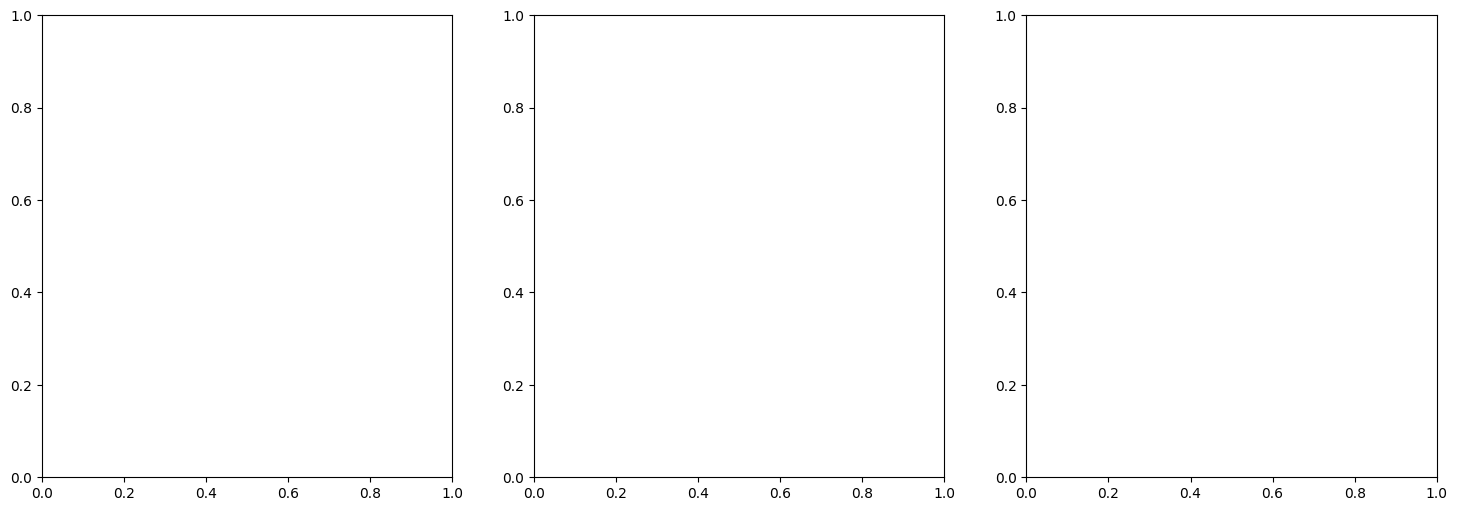

In [10]:
!pip install gplearn

from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Create an empty dataframe to store the metrics
metrics_df_gp = pd.DataFrame(columns=[
    "Threshold", "Train MAE", "Test MAE", "Train MSE", "Test MSE", "Train R^2", "Test R^2"
])

thresholds = [1,2,4]

# Step 2: Loop through thresholds for Symbolic Regression (GP)
for threshold in thresholds:
    # Select features based on MI score threshold
    selected_features = mi_scores_df[mi_scores_df['MI Score'] > threshold]['Feature']
    
    # Filter the training and test data
    X_train_filtered = X_train[selected_features]
    X_test_filtered = X_test[selected_features]
    
    # Create and train the Symbolic Regressor (GP)
    model_gp = SymbolicRegressor(
        population_size=5000, generations=20, tournament_size=20,
        stopping_criteria=0.01, const_range=(-1., 1.), random_state=42
    )
    
    # Train the model
    model_gp.fit(X_train_filtered, y_train)
    
    # Predictions on both train and test data
    y_train_pred = model_gp.predict(X_train_filtered)
    y_test_pred = model_gp.predict(X_test_filtered)
    
    # Compute evaluation metrics
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store results in the DataFrame using pd.concat()
    new_row_gp = pd.DataFrame({
        "Threshold": [threshold],
        "Train MAE": [train_mae],
        "Test MAE": [test_mae],
        "Train MSE": [train_mse],
        "Test MSE": [test_mse],
        "Train R^2": [train_r2],
        "Test R^2": [test_r2]
    })
    
    metrics_df_gp = pd.concat([metrics_df_gp, new_row_gp], ignore_index=True)

# Step 3: Display the results
print(metrics_df_gp)

# Step 4: Save the results to a CSV file
metrics_df_gp.to_csv("symbolic_regression_performance_metrics.csv", index=False)

# Step 5: Plot the results
# Plot MAE, MSE, and R^2 for each threshold
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot MAE
sns.lineplot(data=metrics_df_gp, x='Threshold', y='Train MAE', marker='o', label='Train MAE', ax=axes[0])
sns.lineplot(data=metrics_df_gp, x='Threshold', y='Test MAE', marker='o', label='Test MAE', ax=axes[0])
axes[0].set_title('Mean Absolute Error (MAE) - Symbolic Regression')
axes[0].set_xlabel('MI Score Threshold')
axes[0].set_ylabel('MAE')
axes[0].legend()

# Plot MSE
sns.lineplot(data=metrics_df_gp, x='Threshold', y='Train MSE', marker='o', label='Train MSE', ax=axes[1])
sns.lineplot(data=metrics_df_gp, x='Threshold', y='Test MSE', marker='o', label='Test MSE', ax=axes[1])
axes[1].set_title('Mean Squared Error (MSE) - Symbolic Regression')
axes[1].set_xlabel('MI Score Threshold')
axes[1].set_ylabel('MSE')
axes[1].legend()

# Plot R^2
sns.lineplot(data=metrics_df_gp, x='Threshold', y='Train R^2', marker='o', label='Train R^2', ax=axes[2])
sns.lineplot(data=metrics_df_gp, x='Threshold', y='Test R^2', marker='o', label='Test R^2', ax=axes[2])
axes[2].set_title('R² (Coefficient of Determination) - Symbolic Regression')
axes[2].set_xlabel('MI Score Threshold')
axes[2].set_ylabel('R²')
axes[2].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

